In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'] , mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


There are 70,000 images, and each image has 784 features. This is 
because each image
is 28 × 28 pixels

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

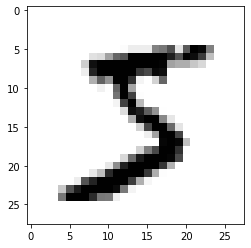

In [7]:
some_digital=X[0]
some_digit_image = some_digital.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [10]:
y[0]

'5'

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y , test_size=0.20 , random_state=42)

In [36]:
from sklearn.linear_model import SGDClassifier
#suited for online learning

In [50]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84212782, 0.87416296, 0.83129755])

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [107]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.91059088, 0.90625167, 0.90147862])

# Confusion Matrix

In [116]:
y_hat=sgd_clf.predict(X_test)

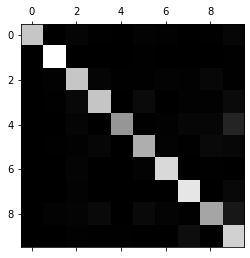

In [117]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test, y_hat)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Precision and Recall

recall = TP / (TP + FN)

precision = TP / (TP + FP)

# F1 score

F1 = 2 × (precision × recall) / (precision + recall)

# classification_report

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat, digits=5))

              precision    recall  f1-score   support

           0    0.99182   0.90320   0.94544      1343
           1    0.95660   0.97813   0.96724      1600
           2    0.83644   0.87826   0.85684      1380
           3    0.87636   0.84089   0.85826      1433
           4    0.96534   0.70965   0.81798      1295
           5    0.84244   0.83582   0.83912      1273
           6    0.92281   0.95057   0.93649      1396
           7    0.88409   0.93879   0.91062      1503
           8    0.84013   0.74355   0.78890      1357
           9    0.68506   0.90070   0.77822      1420

    accuracy                        0.87171     14000
   macro avg    0.88011   0.86796   0.86991     14000
weighted avg    0.88036   0.87171   0.87205     14000



# SVC

In [81]:
from sklearn.svm import SVC
svmm_clf = SVC()

In [82]:
svmm_clf.fit(X_train, y_train)

SVC()

In [83]:
y_hat_svm=svmm_clf.predict(X_test)

In [85]:
print(classification_report(y_test,y_hat_svm, digits=5))

              precision    recall  f1-score   support

           0    0.99031   0.98958   0.98994      1343
           1    0.98264   0.99062   0.98662      1600
           2    0.96839   0.97681   0.97258      1380
           3    0.97127   0.96720   0.96923      1433
           4    0.97167   0.97992   0.97578      1295
           5    0.97553   0.97093   0.97323      1273
           6    0.98226   0.99140   0.98681      1396
           7    0.97342   0.97472   0.97407      1503
           8    0.97311   0.96021   0.96662      1357
           9    0.97500   0.96127   0.96809      1420

    accuracy                        0.97643     14000
   macro avg    0.97636   0.97627   0.97630     14000
weighted avg    0.97642   0.97643   0.97641     14000



If you call the decision_function() method, you will see that it returns 10 scores
per instance (instead of just 1). That’s one score per class:

In [94]:
some_digit_scores = svmm_clf.decision_function([X_test[0]])

In [95]:
some_digit_scores

array([[ 3.72024482,  1.71363301,  7.26389397,  8.29694507,  0.70926464,
         6.22736554, -0.29937525,  2.72689298,  9.31557894,  4.90706374]])

In [97]:
import numpy as np
np.argmax(some_digit_scores)

8

In [98]:
y_test[0]

'8'

# OneVsOneClassifier

based on an SVC

In [100]:
from sklearn.multiclass import OneVsOneClassifier

In [101]:
ovr_clf = OneVsOneClassifier(SVC())

In [102]:
ovr_clf.fit(X_test, y_test)

OneVsOneClassifier(estimator=SVC())

In [104]:
y_hat_ovr=ovr_clf.predict(X_test)

In [119]:
print(classification_report(y_test,y_hat_ovr, digits=5))

              precision    recall  f1-score   support

           0    0.99625   0.98958   0.99290      1343
           1    0.98940   0.99187   0.99064      1600
           2    0.98341   0.98768   0.98554      1380
           3    0.98169   0.97278   0.97722      1433
           4    0.98165   0.99151   0.98655      1295
           5    0.98665   0.98665   0.98665      1273
           6    0.98929   0.99284   0.99106      1396
           7    0.98533   0.98337   0.98435      1503
           8    0.97722   0.98010   0.97866      1357
           9    0.97877   0.97394   0.97635      1420

    accuracy                        0.98500     14000
   macro avg    0.98497   0.98503   0.98499     14000
weighted avg    0.98500   0.98500   0.98499     14000



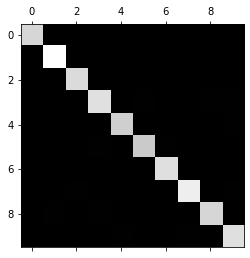

In [120]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test,y_hat_ovr)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [121]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

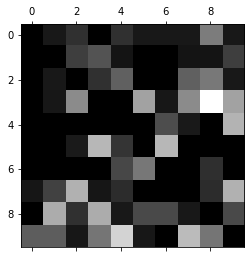

In [122]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn_clf = KNeighborsClassifier()

In [128]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
y_train_knn_pred = knn_clf.predict(X_test)

In [134]:
print(classification_report(y_test,y_hat_ovr, digits=5))

              precision    recall  f1-score   support

           0    0.99625   0.98958   0.99290      1343
           1    0.98940   0.99187   0.99064      1600
           2    0.98341   0.98768   0.98554      1380
           3    0.98169   0.97278   0.97722      1433
           4    0.98165   0.99151   0.98655      1295
           5    0.98665   0.98665   0.98665      1273
           6    0.98929   0.99284   0.99106      1396
           7    0.98533   0.98337   0.98435      1503
           8    0.97722   0.98010   0.97866      1357
           9    0.97877   0.97394   0.97635      1420

    accuracy                        0.98500     14000
   macro avg    0.98497   0.98503   0.98499     14000
weighted avg    0.98500   0.98500   0.98499     14000



# Multioutput Classification

It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, represented
as an array of pixel intensities, just like the MNIST images.

In [135]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [136]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [ ]:
y_train_knn_pred_mod = knn_clf.predict(X_train_mod)

In [ ]:
print(classification_report(y_test,y_hat_ovr, digits=5))